# Pandas Visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Hi everyone, welcome to today's tutorial, where we will be looking at visualization in pandas. Pandas uses matplotlib under the hood, and provides some convenient functions for visualizing data. Before we dive into visualization in pandas, lets take a look at the matplotlib's style package. Matplotlib comes with a number of predefined styles, which we can choose from, to change the default look of our plots. Because pandas is using matplotlib under the hood, this will change the default style of our pandas graphs as well. We can use plt.style.available to see the predefined styles provided.

In [2]:
# see the pre-defined styles provided.
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

Let's use the seaborn-colorblind style, which will change the default colors of our plots to use a color palette that is more color vision deficiency friendly.

In [4]:
# use the 'seaborn-colorblind' style
plt.style.use('seaborn-v0_8-colorblind')

### DataFrame.plot

Now, where the built-in visualization of pandas really shines is in helping with fast and easy plotting of series and DataFrames that can help us explore the data. Let's make a DataFrame. First, we'll set the seed for the random number generator, which will allow us to reproduce the data.

Next, let's add three columns of random time series data.

We can generate the random data by cumulatively summing up random numbers.

numpy has a great function for this called cumsum, which cumulatively sums an array

Let's do this for three columns, A, B and C. And also offset the B column by + 20 and the C column by- 20. Using date_range, we can set the index to be everyday in 2017.

In [5]:
np.random.seed(123)

df = pd.DataFrame({'A': np.random.randn(365).cumsum(0), 
                   'B': np.random.randn(365).cumsum(0) + 20,
                   'C': np.random.randn(365).cumsum(0) - 20}, 
                  index=pd.date_range('1/1/2017', periods=365))
df.head()

,A,B,C
2017-01-01,-1.085631,20.059291,-20.230904
2017-01-02,-0.088285,21.803332,-16.659325
2017-01-03,0.194693,20.835588,-17.055481
2017-01-04,-1.311601,21.255156,-17.093802
2017-01-05,-1.890202,21.462083,-19.518638


Now let's see what this data looks like a little more visually to plot this data we can use the plot method on the DataFrame.

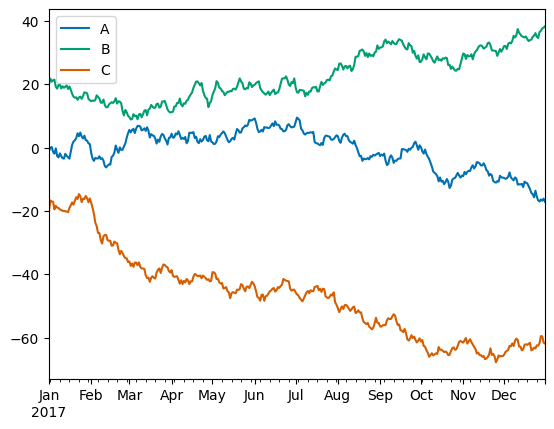

In [6]:
df.plot(); # add a semi-colon to the end of the plotting call to suppress unwanted output

The plot method on series and DataFrame is just a simple wrapper around plt.plot. So when we call df.plot, we get a line graph of all the columns in the data frame with labels.

Notice how the colors are slightly different from the default matplotlib colors because of the style we used.

Also, notice this cool Jupyter Notebook trick. If you add a semicolon to the end of the plotting call, this will suppress unwanted output. And this works with regular matplotlib, too.

DataFrame.plot allows us to plot a number of different kinds of plots. We can select which plot we want to use by pressing it into the kind parameter.

Let's try and create a scatter plot that takes the A and B columns of df.

We pass in scatter to the kind parameter to change the plot type.

This is what we'd get if we called plt.plot on the A and B columns with the point marker parameter.

Passing scatter into the kind keyword argument changed the plot to a scatterplot. You can also choose the plot kind by using the methods dataframe.plot.kind instead of providing the kind keyword argument.

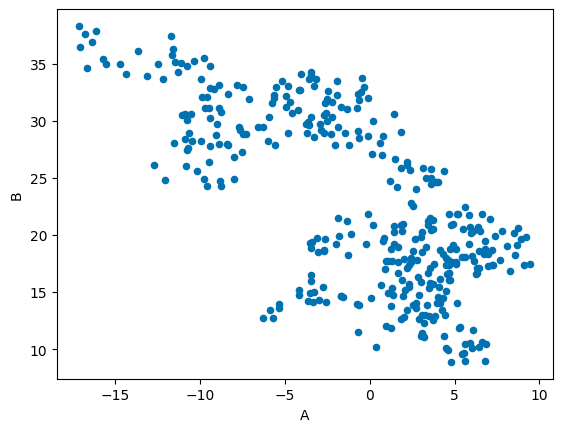

In [7]:
df.plot('A','B', kind = 'scatter');

You can also choose the plot kind by using the `DataFrame.plot.kind` methods instead of providing the `kind` keyword argument.

`kind` :
- `'line'` : line plot (default)
- `'bar'` : vertical bar plot
- `'barh'` : horizontal bar plot
- `'hist'` : histogram
- `'box'` : boxplot
- `'kde'` : Kernel Density Estimation plot
- `'density'` : same as 'kde'
- `'area'` : area plot
- `'pie'` : pie plot
- `'scatter'` : scatter plot
- `'hexbin'` : hexbin plot

Now let's try this and create something a little more complex. This time we want to make a scatterplot with points varying in color and size. We'll use df.plot.scatter, pass in columns A and C.

And set the color C and size S to change based on the value of column B.

Finally, we can choose the color palette used by passing a string into the parameter color map.

Here, I'll use viridis, which is particularly pleasing to the eye.

<AxesSubplot: xlabel='A', ylabel='C'>

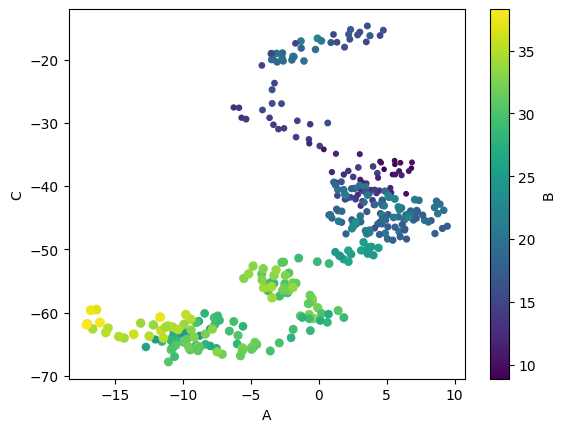

In [8]:
# create a scatter plot of columns 'A' and 'C', with changing color (c) and size (s) based on column 'B'
df.plot.scatter('A', 'C', c='B', s=df['B'], colormap='viridis')

Here we can see the A and C columns plotted against one another with the size and color changing based on the values of the B column. Because df.plot.scatter returns a matplotlib.axes._subplot, we can perform modification on this object just like objects returned by matplotlib plots.

For example, let's see what it looks like when we change the aspect ratio of the AxesSubplot to equal.

Setting the aspect ratio to equal allows the viewer to easily see that the range of series A is much smaller than series C.

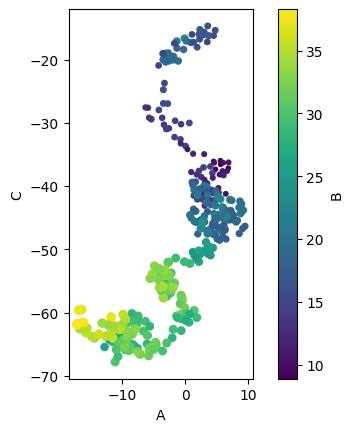

In [9]:
ax = df.plot.scatter('A', 'C', c='B', s=df['B'], colormap='viridis')
ax.set_aspect('equal')

Using pandas, we can also easily do box plots, Histograms, And kernel density estimate plots. Which are useful for visualizing an estimate of a variable's probability density function. Kernel density estimation plots come in handy in data science application where you want to derive a smooth continuous function from a given sample.

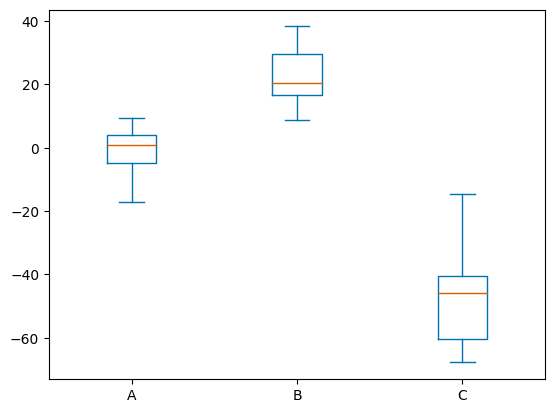

In [10]:
df.plot.box();

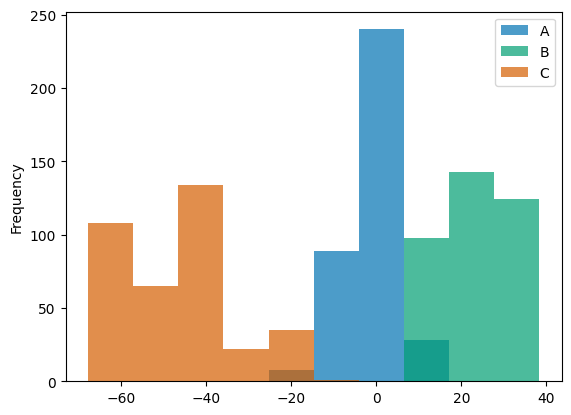

In [11]:
df.plot.hist(alpha=0.7);

[Kernel density estimation plots](https://en.wikipedia.org/wiki/Kernel_density_estimation) are useful for deriving a smooth continuous function from a given sample.

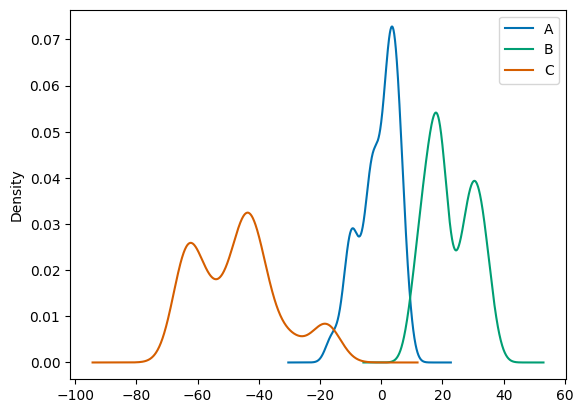

In [14]:
df.plot.kde();

### pandas.tools.plotting

Pandas also has plotting tools that help with visualizing large amounts of data or high dimensional data.

Let's explore a couple of these tools by loading in the iris flower data set.

The iris data set is a classic multivariate data set, which includes the sepal length, sepal width, petal length, and petal width for hundreds of samples of three species of the iris flower. pandas has a plotting tool that allows us to create a scatter matrix from a DataFrame.

[Iris flower data set](https://en.wikipedia.org/wiki/Iris_flower_data_set)

In [15]:
iris = pd.read_csv('resource/iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


A scatter matrix is a way of comparing each column in a DataFrame to every other column in a pairwise fashion. Let's use it to visualize the iris dataframe and see what insights we can gain from our data.

The scatter matrix creates scatter plots between the different variables and histograms along the diagonals.

This allows us to quickly see some of the more obvious patterns in the data set.

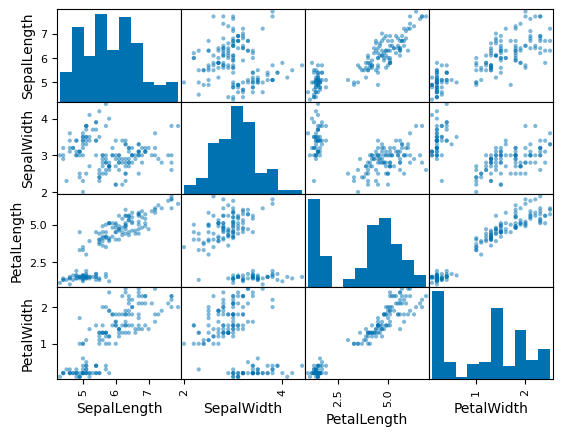

In [16]:
pd.plotting.scatter_matrix(iris);

Looking at the scatter plots, it appears that there are some distinct groupings of the points, which might indicate that there could be some clustering going on. And while this looks impressive and is certainly useful, realize that in the last two weeks you have gained all of the skills to manually build these kinds of plots if you want to. This is nothing more than a four by four grid of subplots, with some plots histograms and the others scatterplots.

Let's look at one more plotting tool in pandas which will help us visualize multivariate data. pandas includes a plotting tool for creating parallel coordinates plots.

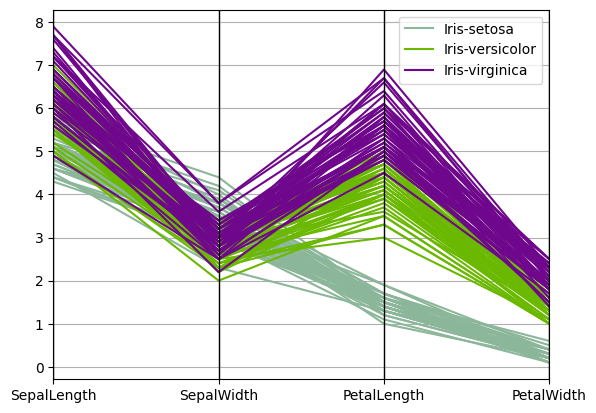

In [17]:
plt.figure()
pd.plotting.parallel_coordinates(iris, 'Name');

Parallel coordinate plots are a common way of visualizing high dimensional multivariate data.

Each variable in the data set corresponds to an equally spaced parallel vertical line. The values of each variable are then connected by lines between for each individual observation.

Coloring the lines by class, in this example the species of flower, allows the viewer to more easily see any patterns or clustering.

For instance, looking at our iris data set, we can see that the petal length and petal width are two variables that split the different species fairly clearly. With iris virginica having the longest and widest petals. And iris setosa having the shortest and narrowest petals. Well that's it for visualization in pandas.

In the next video, we'll look at Seaborn, a powerful package for statistical plotting.

# Seaborn

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Today, we'll be looking at Seaborn, a Python visualization library based on matplotlib.

Seaborn is really just a wraparound matplotlib. It adds styles to make default data visualizations much more visually appealing and makes creation of specific types of complicated plots much simpler.

To get us started, I've imported seaborn as sns.

now, let's set the seed for the random number generator. Which lets us reproduce the data.

Next, let's make a panda series v1 that's 1000 numbers drawn from a normal distribution with a mean of 0, and a standard deviation of 10. Let's also make a second pandas series, v2, which is 2 times v1, plus 1,000 numbers drawn from a normal distribution with a mean of 60 and standard deviation of 15.

In [19]:
np.random.seed(1234)

v1 = pd.Series(np.random.normal(0,10,1000), name='v1')
v2 = pd.Series(2*v1 + np.random.normal(60,15,1000), name='v2')

Now let's see what the histograms of these two variables look like when we plot them side by side.

We can set alpha equal to 0.7 so the histograms don't cover one another up.

For the bin parameter, instead of integer denoting the number of bins we want we can also pass in a specific sequence using np.arange to specify the specific bins we want to use.
9
This is useful for the one when we want to plot two histograms in the same figure to make sure the bin sizes are equivalent for both histograms.

We also add labels so we can see which histogram belongs to which variable using a legend.

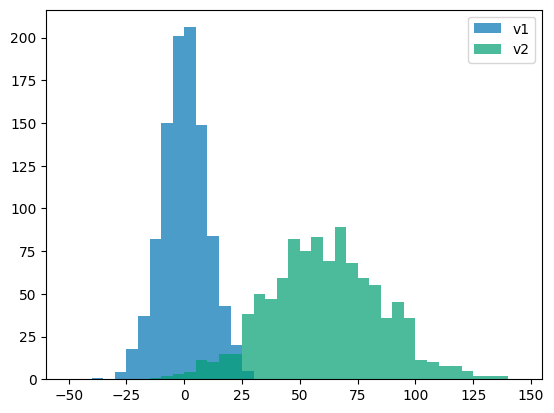

In [20]:
plt.figure()
plt.hist(v1, alpha=0.7, bins=np.arange(-50,150,5), label='v1');
plt.hist(v2, alpha=0.7, bins=np.arange(-50,150,5), label='v2');
plt.legend();

Looking at the histograms we can quickly see that v1 has a lower mean than v2, and that v2 has a larger spread than v1.

Even though up to this point we've only used matplotlib for plotting we see that even importing Seaborn has changed the aesthetics of the plot to a different style from the matplotlib default.

Let's visualize these histograms again but in a different way.

First, let's pass in both of the series v1 and v2 in a list. And set the histtype to barstacked.

Setting normed to True will normalize the histogram to form a probability density.

Next, let's create a variable v3, which is the combination of v1 and v2.

We'll use v3 to plot a kernel density estimate plot over the stacked histogram. The kernel density estimation plot estimates the probability density function of the variable v3. Plotting it on top of the stacked histograms of v1 and v2 allows us to see the relationship between these two visualizations.

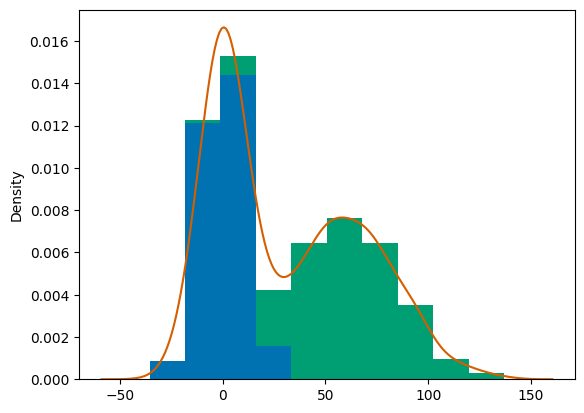

In [21]:
# plot a kernel density estimation over a stacked barchart
plt.figure()
plt.hist([v1, v2], histtype='barstacked', density=True);
v3 = np.concatenate((v1,v2))
sns.kdeplot(v3);

Seaborn provides a convenient function for these type of plots sns.distplot. Let's take a look at how it works.

We can pass in the variable we want to visualize along with keyword arguments for each of the individual components of the plot. Let's set the histogram color to teal and the KDE color to navy.

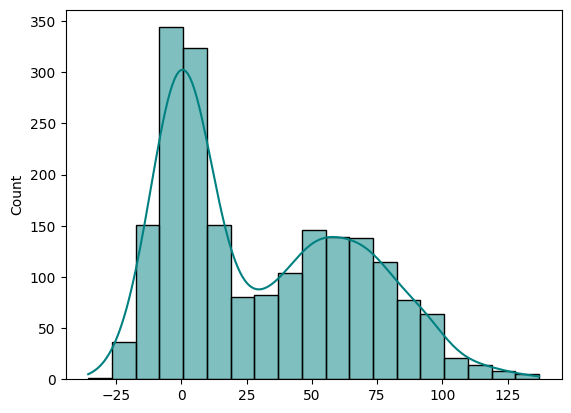

In [22]:
plt.figure()

sns.histplot(v3, color='Teal', kde=True);

Now let's look at an example of one of the types of complex plots that Seborn provides a convenient interface for, the joint plot.

The jointplot creates a scatterplot along the histograms for each individual variable on each axis.

You've actually seen jointplots in module two and created them manually yourself.

To create a jointplot, we just type sns.jointplot and pass in the two series, v1 and v2.

Setting alpha to 0.4 will help with visualizing overlapping points. The jointplot allows us to visualize the distribution of the two variables individually. As well as relationships between the variables. Using jointplot we can see that v1 and v2 appear to be normally distributed variables that are positively correlated. Because Seaborn uses matplotlib we can tweak the plots using Matplotlib's tools.

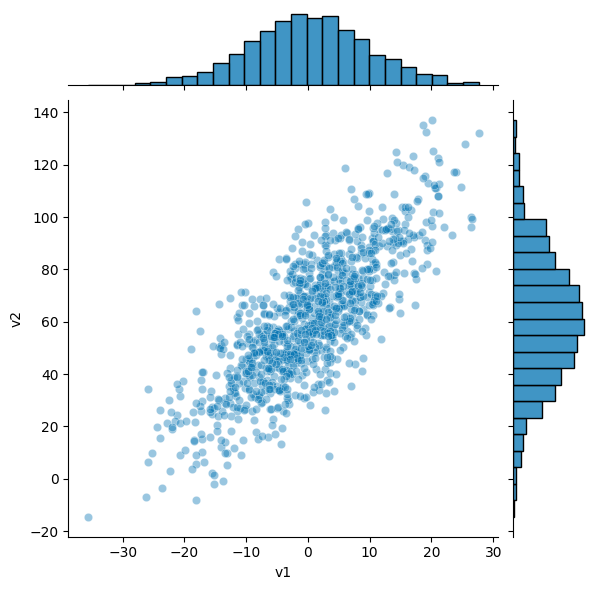

In [23]:
sns.jointplot(x=v1, y=v2, alpha=0.4);

Some of the plotting functions in Seaborn return a matplotlib axis object. While others operate on an entire figure and produce plots with several panels, returning a Seaborn grid object.

In both cases, matplotlib can be used to further tweak the plots. For example, sns.jointplot returns a Seaborn grid object.

From this we can plot a map plot axis subplot object using grid.ax_joint.

Then, we can set the aspect ratio to be equal, using set_aspect equal. Hexbin plots are the bivariate counterpart to histograms. Hexbin plots show the number of observations that fall within hexagonal bins.

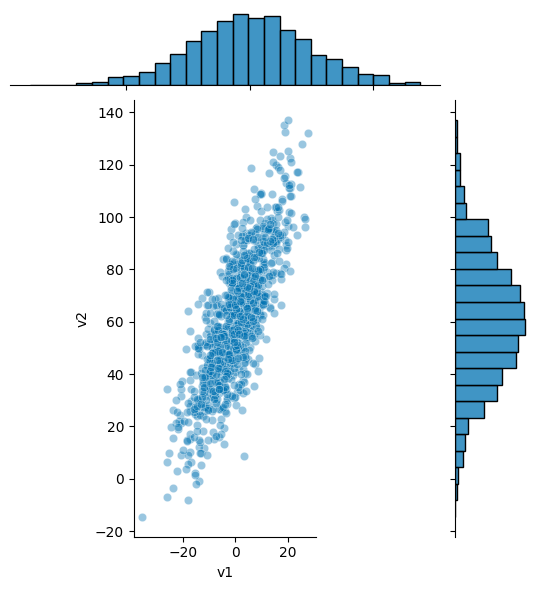

In [24]:
grid = sns.jointplot(x=v1, y=v2, alpha=0.4);
grid.ax_joint.set_aspect('equal')

Sns joint plot includes the hex bin style we can use by passing in hex to the kind parameter.

The hexbin style of plot works well with relatively large data sets. Another good option for visualizing the distribution of data sets is kernel density estimations or KDE plots. You can think of two dimensional KDE plots as the continuous version of the hexbin jointplot.

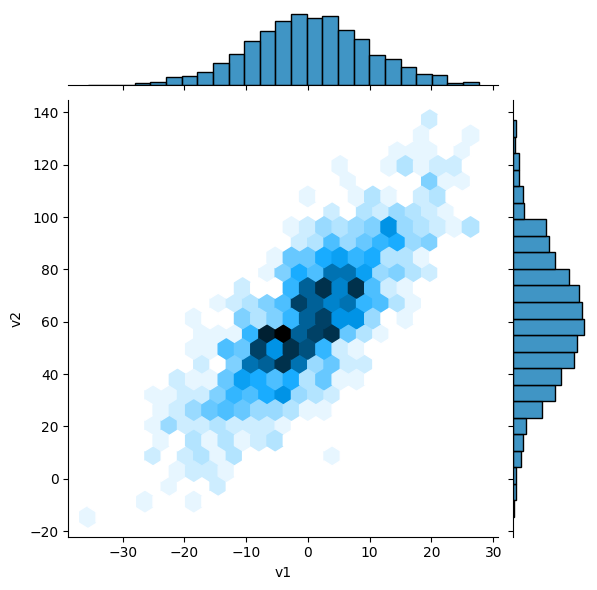

In [25]:
sns.jointplot(x=v1, y=v2, kind='hex');

First, let's tell Seaborn to use a different style using sns.set_style('white').

All of the following charts will have the gray grid turned off.

Now we'll create a joint plot just like before, except this time, let's set the kind to kde.

Finally, let's space to 0, which will plot the marginal distributions directly on the border of the scatter plot. We can see that Seaborn has some built-in options for easy customization. And provides us with easy to create and beautiful plots for exploring the distributions of your data. For the last part of this tutorial, let's load in the iris dataset, to see how Seaborn handles visualizations of categorical data.

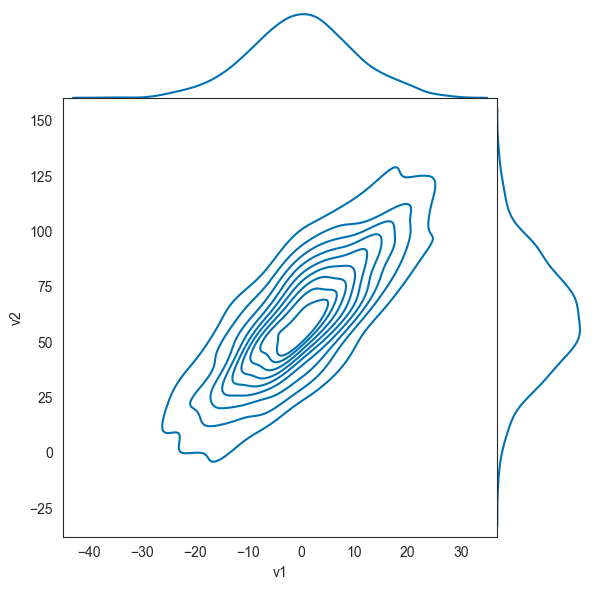

In [26]:
# set the seaborn style for all the following plots
sns.set_style('white')

sns.jointplot(x=v1, y=v2, kind='kde', space=0);

Similar to pandas, Seaborn has a built in function that creates a scatterplot matrix.

We pass in the iris data of frame.

In [28]:
iris = pd.read_csv('resource/iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Tell it to map name to different colors using the hue parameter.

And tell it to use a kde along the diagonals instead of the default histograms.

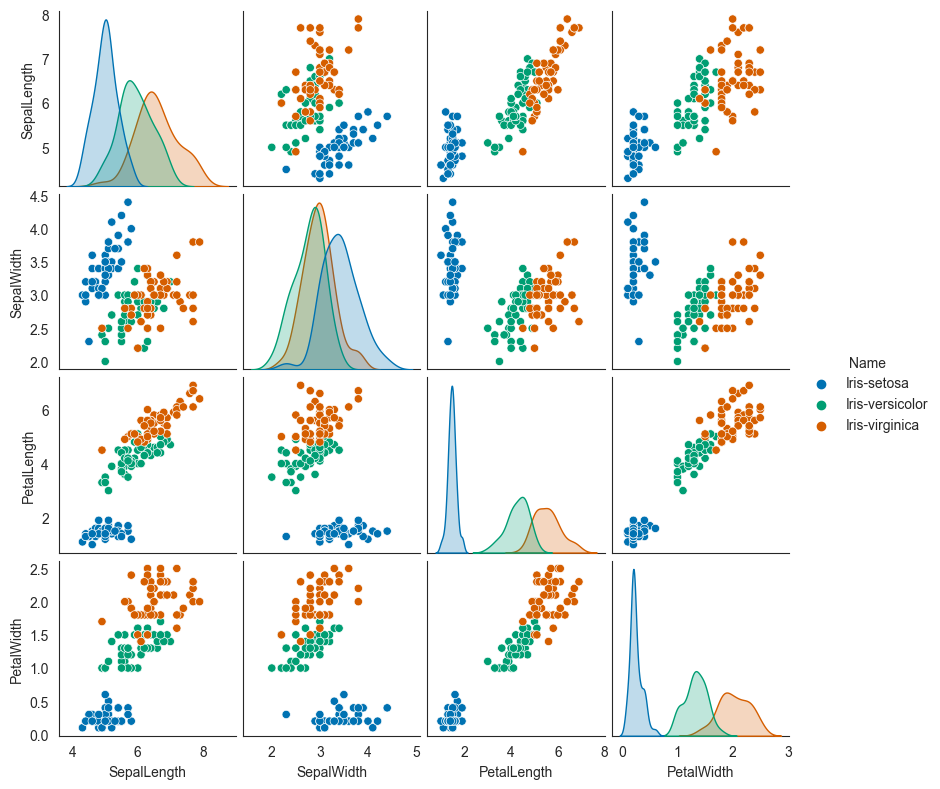

In [29]:
sns.pairplot(iris, hue='Name', diag_kind='kde', height=2);

Looking at the pair plot, it's clear there are some clusters in the data set. It looks like peddle length and peddle width are good options for separating the observations, whereas width is not a strong separator.

Using pair plot to look at your data frame can be a very useful tool in exploratory data analysis. One final plot I'd like to show you is called the violin plot.

You can think of a violin plot as a more informative version of a box plot.

To demonstrate, let's plot a violin plot next to a swarm plot, which you can think of as a scatter plot for categorical data.
First let's create a new figure and a subplot.
Next, we'll create the swarmplot, passing in Name and PetalLength, and the data, which is the iris data frame.
For the next subplot, we'll create the violinplot, again passing in Name, PetalLength and the iris data frame.

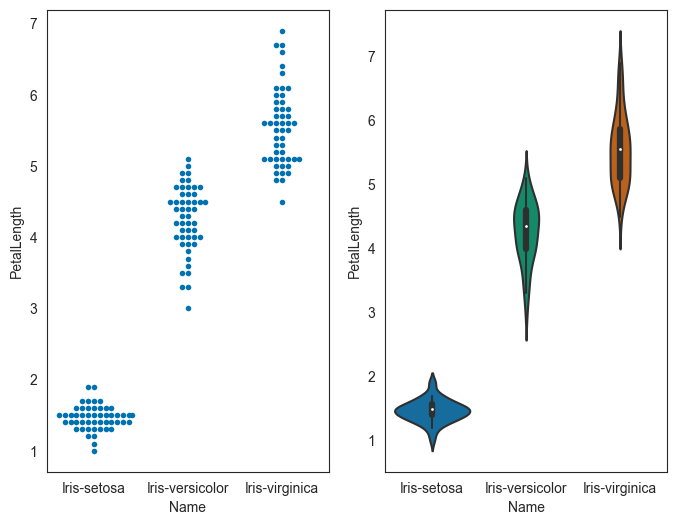

In [30]:
plt.figure(figsize=(8,6))
plt.subplot(121)
sns.swarmplot(x='Name', y='PetalLength', data=iris, size=4);
plt.subplot(122)
sns.violinplot(x='Name', y='PetalLength', data=iris);

Looking at the swarmplot, each species has its own column and each observation's petal length is shown. With more common values appearing as the wide parts of the cluster, much like a histogram.

The violinplot is like box plot with a rotated kernel density estimation on each side.

Violin plots convey more information than box plots and are able to show particular phenomena within the distribution that box plots are unable to convey such as multi modality. Seaborn is a library that not only adds new styles and visual aspects. But also introduces new functionality such as joint plots, scatter matrix plots, and violin plots.

Seaborn is being actively developed, and is easy to install, which makes it an indispensible part of a data scientist's toolkit. But keep in mind, this is functionality built on top of matplotlib, and these are largely matplotlib artists being used. So, if you have any ideas for a new statistical visualization, or you've read about one in a publication or journal. You should have the ability to create your own visualization toolkits.

That's it for Seaborn tutorial, thanks for watching, happy plotting.

# Mapping and Geographic Investigation 

Capturing physical landscape traits in a written form is perhaps one of the oldest and most common examples
of information visualization still in use today. Geographical Information Systems (GIS) are high specialized
and complex, and made up of a myriad of unique techniques and tools. In this lecture I want to dip our toes
into this world, and show you how you can leverage geographical information to lead to insight in
computational narratives.

In [31]:
# Let's start with bringing in a few of our common libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
# And we'll set some matplotlib defaults. By setting these in the rcparams list we can
# be certain that our figure size will be the same throughout our investigation. When
# you do this make sure to do it at the top of your notebook before using matplotlib.
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [16.0,8.0]

In [33]:
# Let's bring in that data on my cycling
df=pd.read_csv("resource/wipeout.csv")
df.head()

,timestamp,cadence,distance,enhanced_altitude,enhanced_speed,fractional_cadence,heart_rate,position_lat,position_long,speed,timestamp.1,position_lat_degrees,position_long_degrees
0,2019-11-01 20:12:03,NaN,0.00,281.6,0.000,NaN,84.0,504424439.0,-999065791.0,NaN,2019-11-01 20:12:03,42.280368,-83.740727
1,2019-11-01 20:12:04,NaN,0.00,281.6,0.000,NaN,84.0,504424439.0,-999065791.0,NaN,2019-11-01 20:12:04,42.280368,-83.740727
2,2019-11-01 20:12:07,NaN,0.00,281.6,0.000,NaN,87.0,504424439.0,-999065791.0,NaN,2019-11-01 20:12:07,42.280368,-83.740727
3,2019-11-01 20:12:08,NaN,0.32,281.6,1.036,NaN,88.0,504424447.0,-999065835.0,NaN,2019-11-01 20:12:08,42.280369,-83.740731
4,2019-11-01 20:12:10,NaN,3.30,281.8,2.976,NaN,89.0,504424476.0,-999066382.0,NaN,2019-11-01 20:12:10,42.280371,-83.740777


Ok, so this data is made up of a latitude and longitude, a timestamp on what looks to be a second frequency
as well as measurements such as heart rate, in beats per minute, and an enhanced_altitude probably in feet,
speed, and so on. The first thing we need to consider when mapping is longitude and lattitude. Now, catographers
for thousands of years have come up with different ways to take a "mostly round" globe and turn it into a 2
dimensional rectangle, and these methods are called __projections__. If you are going to work a lot with
catography data you're undoubtedly going to have to learn some of these projections. I'm not an expert in all
the different ways mapping coordinates are stored, but even in this simple example it looks odd, why do we just
have a single number?

It turns out that this particular data source is trying to capture the maximum prescision possible in an 
unsigned integer, so we first need to convert these to more traditional decimal format. To do this you'll
need to go to the docs and identify how to do the transformation, but I'm saving you that step here because
I already know what it is.

In [34]:
# If we multiply by 180 degrees then dividing by 2 to the power of 31 we get to convert our units into
# something a bit more meaningful
df["position_lat_degrees"] = df["position_lat"] * ( 180 / 2**31 )
df["position_long_degrees"] = df["position_long"] * ( 180 / 2**31 )

# Now, it turns out we're not really done with this. You see, the earth is round(ish), but we are going to try
# and look at it on the screen which is flat(ish). Because we are going to plot on top of a two dimensional image
# we're going to want to use the Mercantor projection. I'm going to share with you the code to convert from 
# latitude in degrees to a flat Mercantor projection which
# comes courtesy of the Open Street Map effort at https://wiki.openstreetmap.org/wiki/Mercator

import math
def lat2y(a):
  return 180.0/math.pi*math.log(math.tan(math.pi/4.0+a*(math.pi/180.0)/2.0))
df["position_lat_degrees_mercantor"]=df["position_lat_degrees"].apply(lat2y)

# And lastly, let's drop anything with missing values. This is a simplification for the moment, and might not
# be what you actually want to do in practice
df=df[['timestamp','enhanced_altitude','enhanced_speed','heart_rate','position_lat_degrees_mercantor',
       'position_long_degrees','position_lat_degrees']].dropna()
df.head()

,timestamp,enhanced_altitude,enhanced_speed,heart_rate,position_lat_degrees_mercantor,position_long_degrees,position_lat_degrees
0,2019-11-01 20:12:03,281.6,0.000,84.0,46.739975,-83.740727,42.280368
1,2019-11-01 20:12:04,281.6,0.000,84.0,46.739975,-83.740727,42.280368
2,2019-11-01 20:12:07,281.6,0.000,87.0,46.739975,-83.740727,42.280368
3,2019-11-01 20:12:08,281.6,1.036,88.0,46.739976,-83.740731,42.280369
4,2019-11-01 20:12:10,281.8,2.976,89.0,46.739979,-83.740777,42.280371


The first approach I want to show you is probably the most simple. The gist is that we will render an image 
behind an Axes object, then just use our regular plotting on the Axes object. For this to work it means we
need an image and we need to know the coordinates of the image bounds. Then we can set the "extent", which
represents the bounds of the map. This means our image behind the Axes object will be using the same
coordinate system as the Axes object itself, and the plot will be locked.

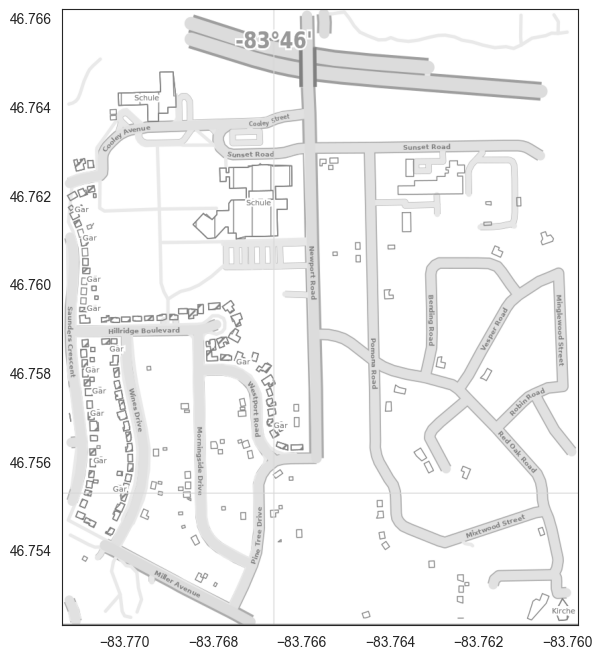

In [36]:
# First the image. I got mine through an export from Open Street Map and saved it in map.png. You can get a
# map directly from http://www.openstreetmap.org. To display this, we use the pyplot imread() function and
# pair it with imshow()
image=plt.imread("resource/map.png")
plt.imshow(image, alpha=0.5, extent=[-83.77141,-83.75977,46.75230,46.76620])

Ok, great! That created a map, and we can see the X and Y axes are constrained by the extent that I setup.
Now, the extent doesn't really matter, you can choose whatever you want, just make sure it aligns with
whatever your map is.

Now it's actually really easy to overlay our data on top of this plot, we just use whatever plotting
function which exists in pyplot that we are interested in! In this case I'm going to use scatter(). I'm
going to add a color bar as well, and change the values of the dots being plotted based on the heart rate column
in our data.

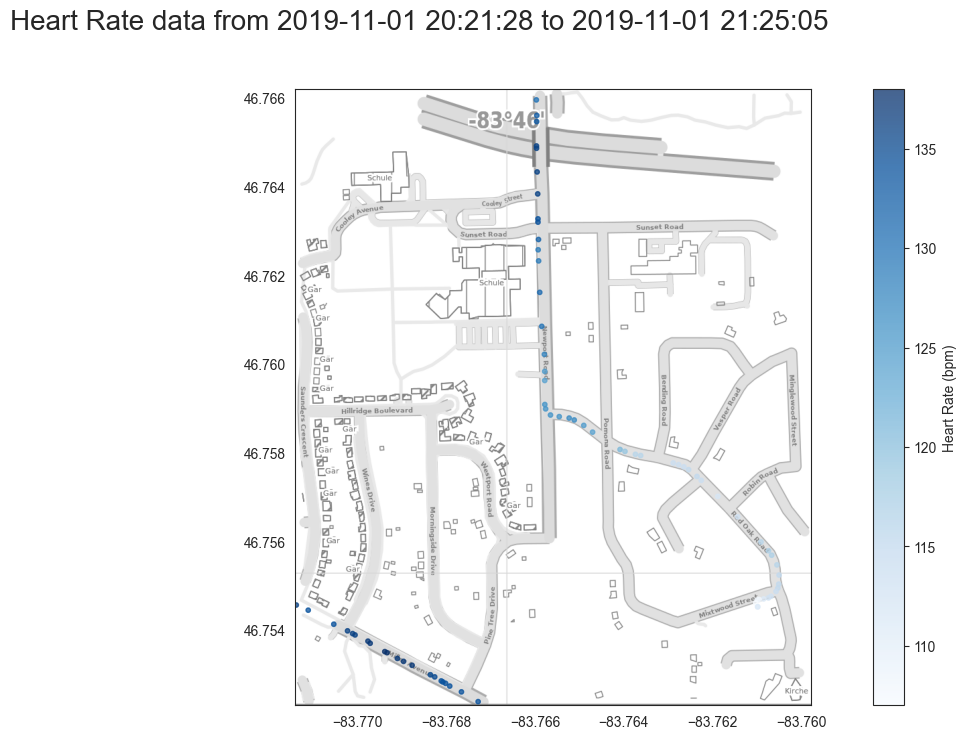

In [37]:
# Reshow the image, because we didn't turn off image closing in jupyter
plt.imshow(image, alpha=0.5, extent=[-83.77141,-83.75977,46.75230,46.76620])
# Plot our longitude and mercantor projected latitude data. We can set the series of data we want to be the
# colors of points using the c parameters, and we can choose from different color maps using the cmap
# parameter. Also, I'm only going to plot those points which actually appear on the map itself.
small_df = df[(df["position_long_degrees"] > -83.77141) &
              (df["position_long_degrees"] < -83.75977) &
              (df["position_lat_degrees_mercantor"] > 46.75230) &
              (df["position_lat_degrees_mercantor"] < 46.76620)]
   
plt.scatter(small_df["position_long_degrees"],small_df["position_lat_degrees_mercantor"],
            s=10, c=small_df["heart_rate"], cmap='Blues', alpha=0.75)
# Now we get pyplot to render a colorbar so we know the meeting of the colors
plt.colorbar().set_label("Heart Rate (bpm)")
# And let's set a meaningful title
plt.suptitle("Heart Rate data from {} to {}".format(np.min(small_df["timestamp"]),np.max(small_df["timestamp"])),size='20');

Nice! We have a map, and we have some points plotted on the map showing the various heart rate measurements! If
you look at this you'll notice that the lighter more transparent circles are closer to 100 beats per minute,
while the more dark full circles are close to 135 beats per minute. With a bit of insider knowledge - since it was
me on the bike - I can tell you that the street in the lower left corner is an up hill I would cycle and that the
street coming down from the top is actually a down hill for a return trip, so this seems to be right.

Now, this method of creating a map using an image with extents is simple and reliable, though it's not fast or seemless. 
If we just tossed our full dataframe on there it would become aparent that we need to go find a map 
with the right extents to do the plotting.

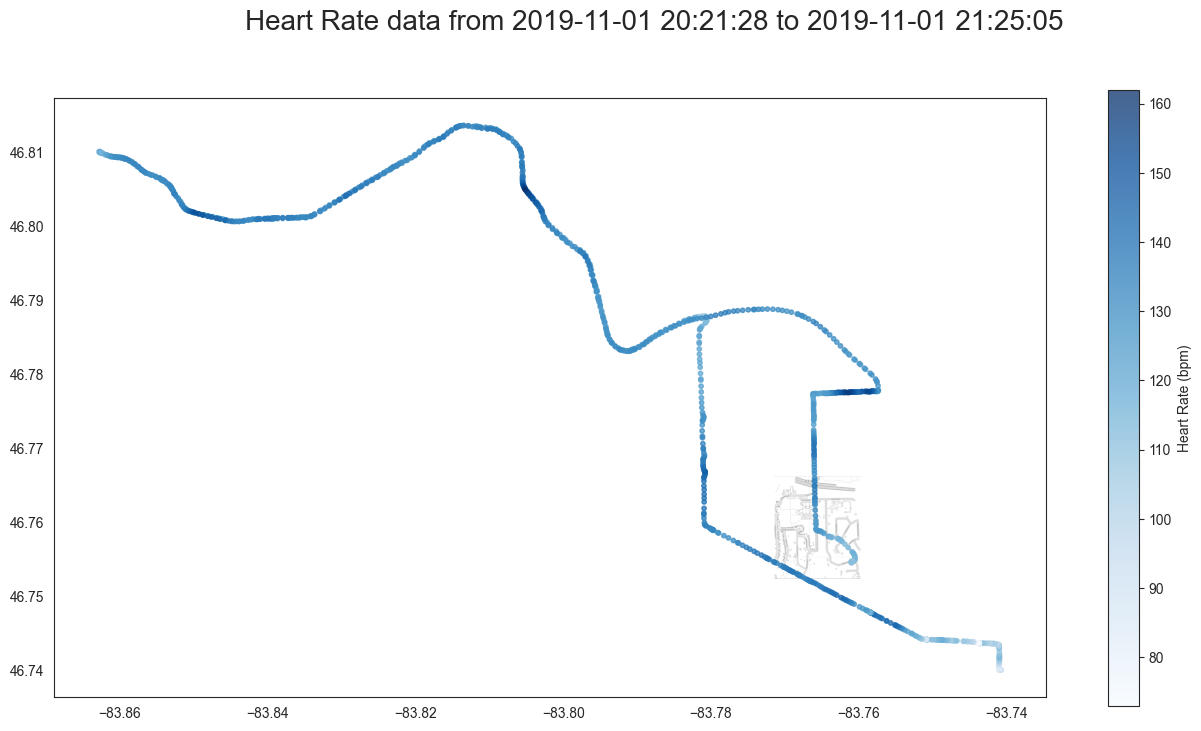

In [38]:
# Let's see the exact same code, but with all of the data points in it
plt.imshow(image, alpha=0.5, extent=[-83.77141,-83.75977,46.75230,46.76620])
plt.scatter(df["position_long_degrees"],df["position_lat_degrees_mercantor"],
            s=10, c=df["heart_rate"], cmap='Blues', alpha=0.75)
plt.colorbar().set_label("Heart Rate (bpm)")
plt.suptitle("Heart Rate data from {} to {}".format(np.min(small_df["timestamp"]),np.max(small_df["timestamp"])),size='20');

So now we get to see my whole cycling route, but we only have this tiny portion of the map.

An alternative approach taken for maps in web systems is to use tile server. Tile servers actually create a matrix of maps at different zoom levels, then serve up portions of a map (the tiles) as requested from the client. This is how Google Maps, for instance, works, and it creates a responsive experience at the cost of being a bit more fragile, as network access is needed. This paradigm is also available in the Jupyter notebooks as well, through a project called folium. This project is all client side JavaScript which does the map requesting and rendering. To connect this to our python backend we can use the folium project.

Be warned, this is a new library, so it takes us out of the matplotlib world, but I think you might find it is pretty natural if you need to map online plots.

In [40]:
# Let's import Folium
import folium
# Now let's render a spot from our previous data, for this we pick the center point of the map and a zoom level
m=folium.Map(location=[42.24,-83.764], zoom_start=12)
# A key eye will notice that I had to reverse our longitude and latitude for this library, *and* I'm not using
# the mercantor changed values for longitude. Welcome to geographical information systems!
display(m)

In [41]:
# Immediately you'll notice that the user experience is nice, and you can see that the data is being streamed
# by the OpenStreetMap project (lower right corner).

# We can add callouts to the map using the Marker class, let's set this for our start and end.
m=folium.Map(location=[42.296,-83.768], zoom_start=15)
folium.Marker([df["position_lat_degrees"].iloc[0],df["position_long_degrees"].iloc[0]], 
              popup="Start").add_to(m)
folium.Marker([df["position_lat_degrees"].iloc[-1],df["position_long_degrees"].iloc[-1]], 
              popup="Stop").add_to(m)

# We also want to map the whole cycling route. The docs for folium point to a PolyLine as the appropriate
# class to use. The PolyLine takes a list of locations as tuples, which means we have to combine our latiude
# and longitude values pairwise, and this is easily achieved through the use of python's zip() function
route=folium.PolyLine(locations=zip(df["position_lat_degrees"],df["position_long_degrees"]),
                    weight=5,color='blue').add_to(m)

# Let's take a look at that
display(m)

Wow! What a nice rendering. We can zoom and look around and get a nice interactive sense of our data. And
the docs really demonstrate how to use leaflet to do interesting things that have been well optimized in the
browser and JavaScript world, including setting colors through HTML codes and events. This is just the tip of
the iceberg when it comes to using folium, and I'd like to encourage you dive into those docs and play around
with it to learn more.

In this lecture I've just touched on some of the information mapping you can do mixing geographical
structures and data. We've seen several different approaches, from rendering a simple data plot superimposed
over a map in matplotlib, to drawing on top of a javascript based map with folium. Geographical Information Systems (GIS) are a big area,
but it's helpful to know a few things about spatial representation of data for those times when the physical
is a part of your investigation. 